### Experiments with Hadoop and Spark

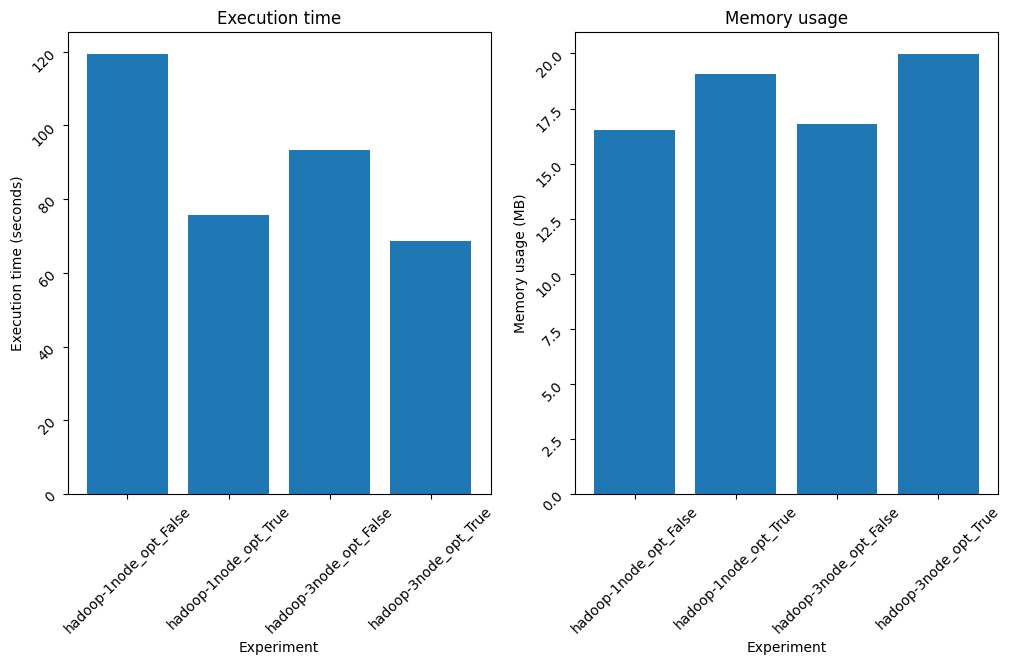

In [29]:
import json
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

def file_name(exp_name, optimized):
    return f"execution_metrics_{exp_name}_opt_{optimized}.json"

results_dir = Path("results")
experiment_names = [
    ("hadoop-1node", "False"),
    ("hadoop-1node", "True"),
    ("hadoop-3node", "False"),
    ("hadoop-3node", "True"),
]

data_dict = {"experiment": [], "execution_time": [], "memory_usage_mb": []}
for experiment in experiment_names:
    setup, optimized = experiment
    with open(results_dir / file_name(setup, optimized), "r") as f:
        metrics = json.load(f)
    data_dict["experiment"].append(f"{setup}_opt_{optimized}")
    data_dict["execution_time"].append(metrics["execution_time"])
    data_dict["memory_usage_mb"].append(metrics["memory_usage_mb"])

df = pd.DataFrame(data_dict)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title("Execution time")
axes[0].set_xlabel("Experiment")
axes[0].set_ylabel("Execution time (seconds)")
axes[0].tick_params(labelrotation=45)
axes[0].bar(df["experiment"], df["execution_time"])

axes[1].set_title("Memory usage")
axes[1].set_xlabel("Experiment")
axes[1].set_ylabel("Memory usage (MB)")
axes[1].tick_params(labelrotation=45)
axes[1].bar(df["experiment"], df["memory_usage_mb"]);

### Dataset Analysis

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data/spotify_dataset.csv")

numerical_features = ['Tempo', 'Loudness (db)', 'Energy', 'Danceability', 'Positiveness', 'Speechiness']
correlation_matrix = df[numerical_features].corr()
avg_energy = df.groupby('Genre')['Energy'].mean().sort_values(ascending=False)
emotion_counts = df['emotion'].value_counts()
top_similar_songs = df[['Similar Song 1', 'Similarity Score 1']].sort_values(by='Similarity Score 1', ascending=False).head(5)

In [13]:
df = pd.read_csv("data/spotify_dataset.csv")
df.head()

,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Good for Morning Routine,Similar Artist 1,Similar Song 1,Similarity Score 1,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,03:47,sadness,hip hop,Thr!!!er,2013-04-29,D min,0.437870,...,0,Corey Smith,If I Could Do It Again,0.986061,Toby Keith,Drinks After Work,0.983719,Space,Neighbourhood,0.983236
1,!!!,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,Thr!!!er,2013-04-29,A# min,0.508876,...,0,Hiroyuki Sawano,BRE@TH//LESS,0.995409,When In Rome,Heaven Knows,0.990905,Justice Crew,Everybody,0.984483
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,Louden Up Now,2004-06-08,A Maj,0.532544,...,0,Ricky Dillard,More Abundantly Medley Live,0.993176,Juliet,Avalon,0.965147,The Jacksons,Lovely One,0.956752
3,!!!,Ooo,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,As If,2015-10-16,A min,0.538462,...,0,Eric Clapton,Man Overboard,0.992749,Roxette,Don't Believe In Accidents,0.991494,Tiwa Savage,My Darlin,0.990381
4,!!!,Freedom 15,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,As If,2015-10-16,F min,0.544379,...,0,Cibo Matto,Lint Of Love,0.981610,Barrington Levy,Better Than Gold,0.981524,Freestyle,Its Automatic,0.981415


In [14]:
df.shape

(498052, 39)

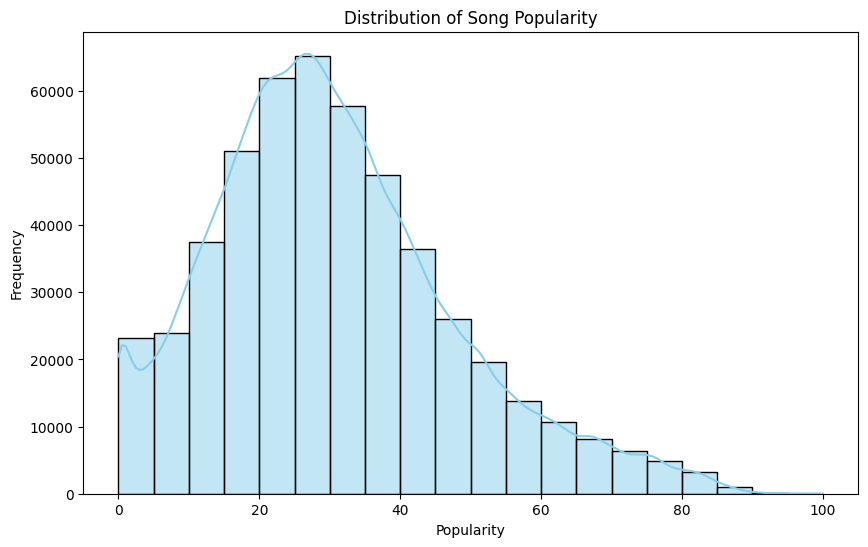

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

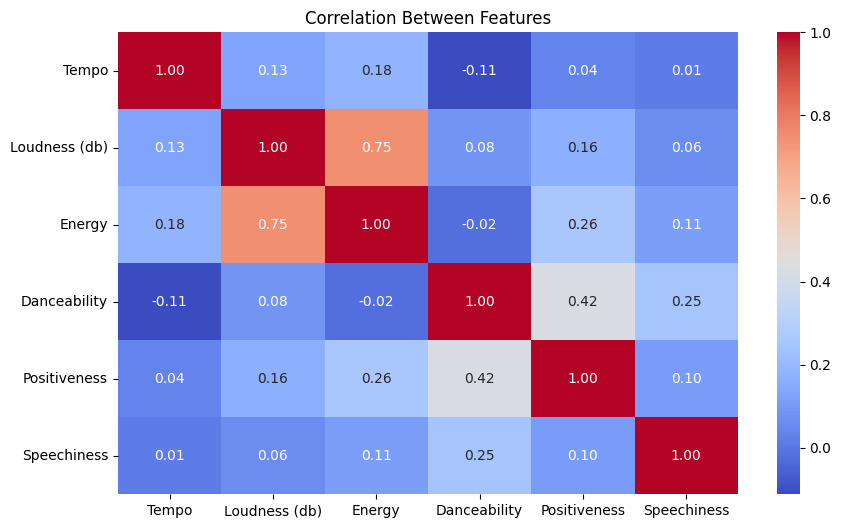

In [17]:
numerical_features = ['Tempo', 'Loudness (db)', 'Energy', 'Danceability', 'Positiveness', 'Speechiness']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Features')
plt.show()



/tmp/ipykernel_77795/3613788464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_energy.index, y=avg_energy.values, palette='viridis')


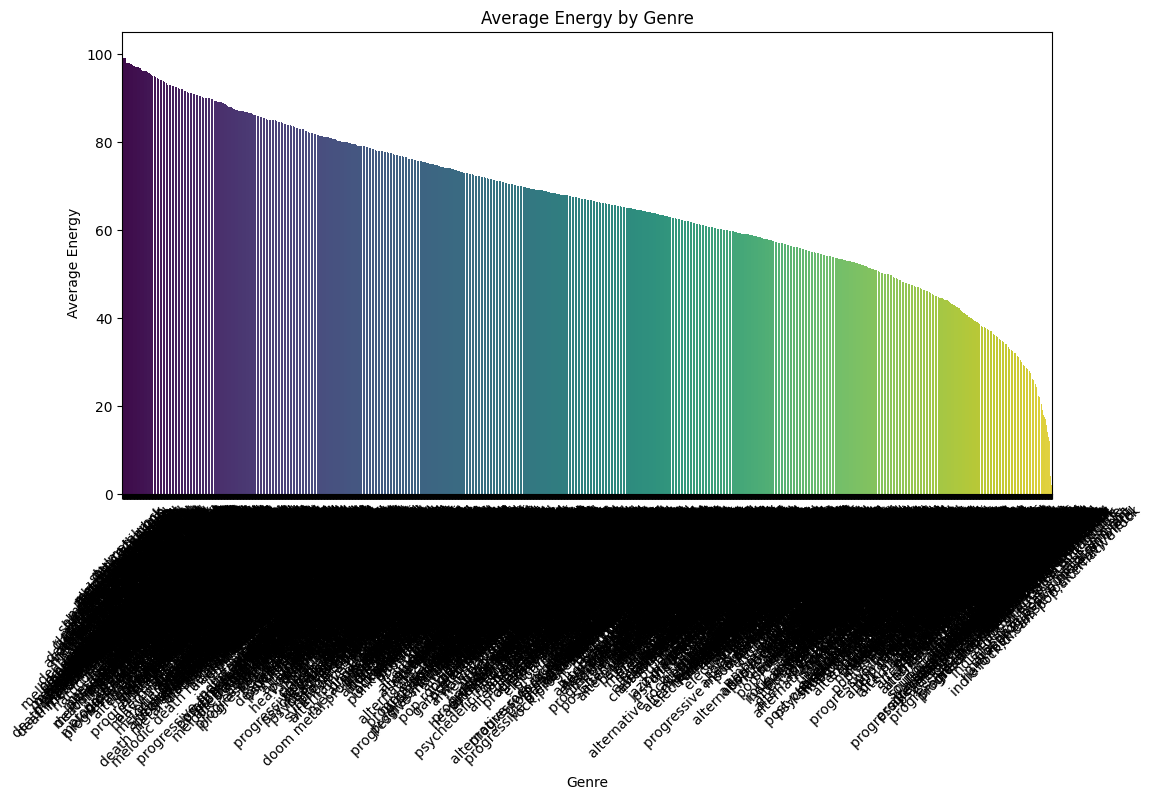

In [18]:
plt.figure(figsize=(12, 6))
avg_energy = df.groupby('Genre')['Energy'].mean().sort_values(ascending=False)
sns.barplot(x=avg_energy.index, y=avg_energy.values, palette='viridis')
plt.title('Average Energy by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Energy')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_77795/1907602146.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette='coolwarm')
/tmp/ipykernel_77795/1907602146.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette='coolwarm')
/tmp/ipykernel_77795/1907602146.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette='coolwarm')
/tmp/ipykernel_77795/1907602146.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and s

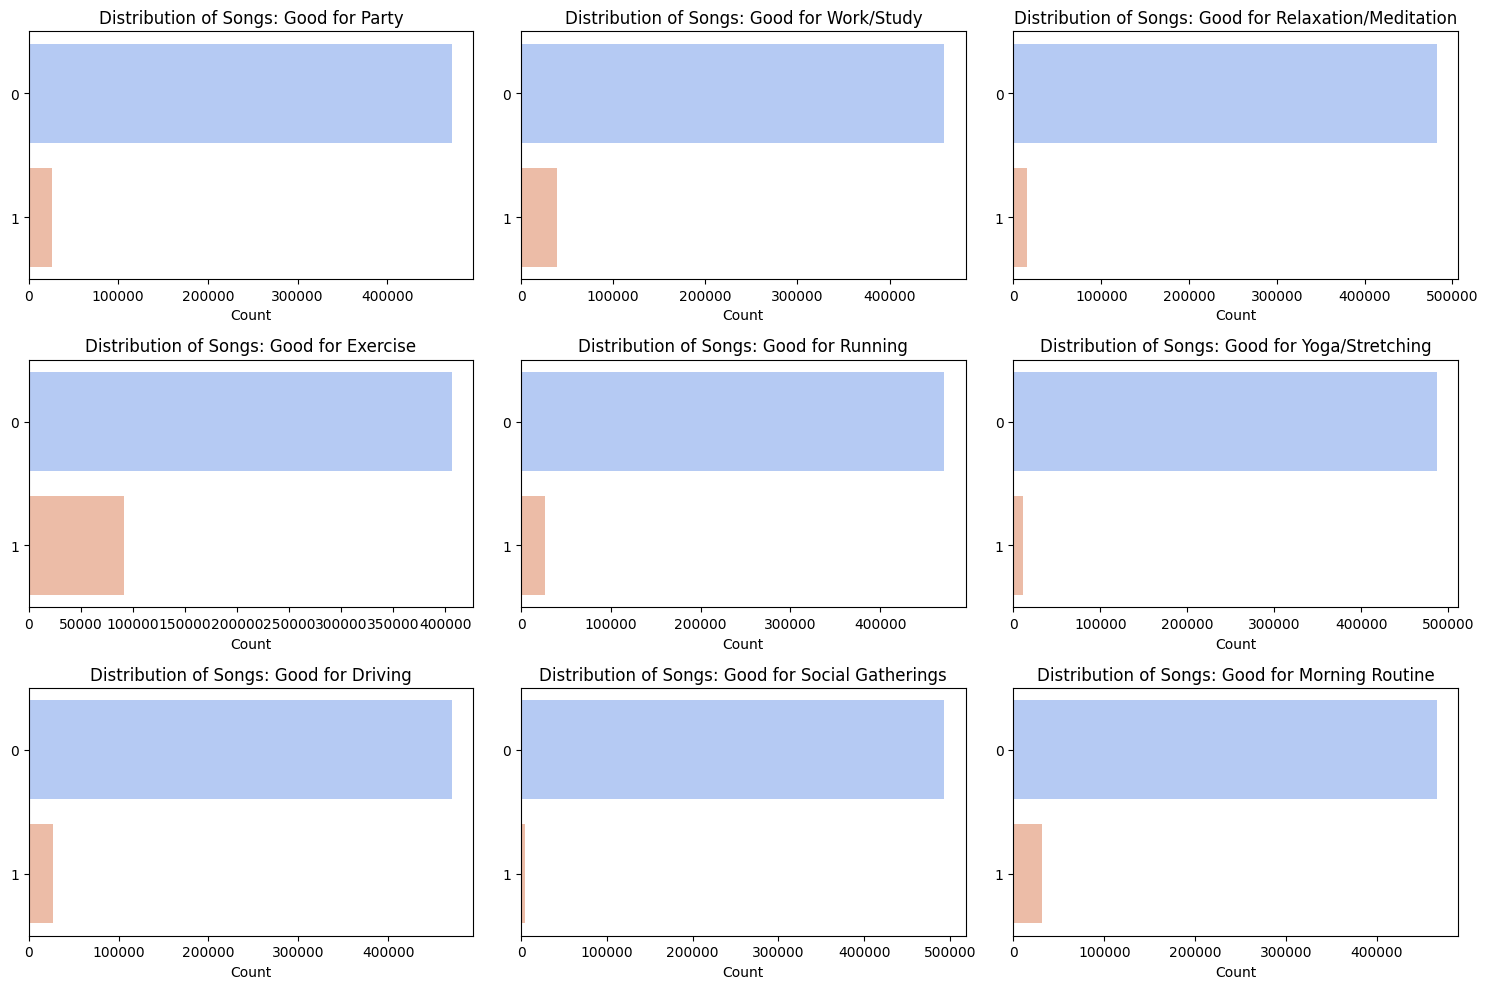

In [19]:
good_for_columns = ['Good for Party', 'Good for Work/Study', 'Good for Relaxation/Meditation',
                    'Good for Exercise', 'Good for Running', 'Good for Yoga/Stretching',
                    'Good for Driving', 'Good for Social Gatherings', 'Good for Morning Routine']

plt.figure(figsize=(15, 10))
for i, col in enumerate(good_for_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=col, data=df, palette='coolwarm')
    plt.title(f'Distribution of Songs: {col}')
    plt.xlabel('Count')
    plt.ylabel('')
plt.tight_layout()
plt.show()

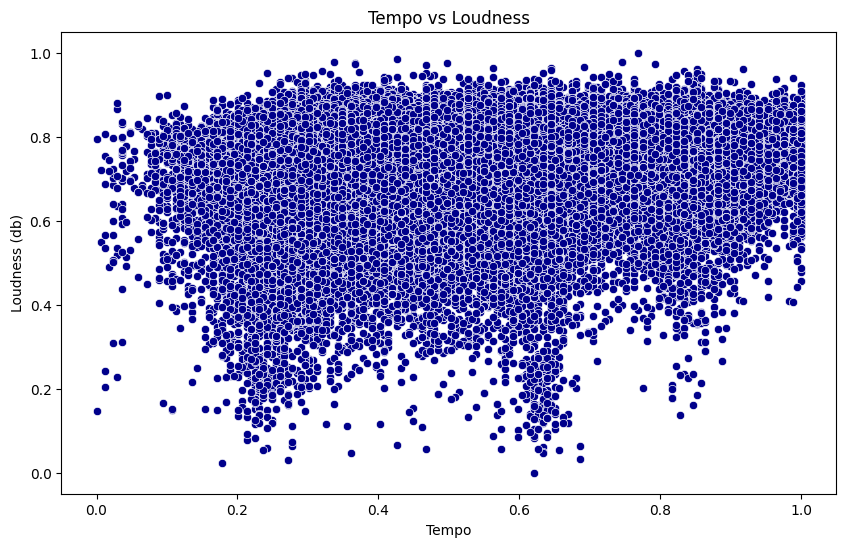

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tempo', y='Loudness (db)', data=df, color='darkblue')
plt.title('Tempo vs Loudness')
plt.xlabel('Tempo')
plt.ylabel('Loudness (db)')
plt.show()

/tmp/ipykernel_77795/982918747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Key', y='Popularity', data=df, palette='Set2')


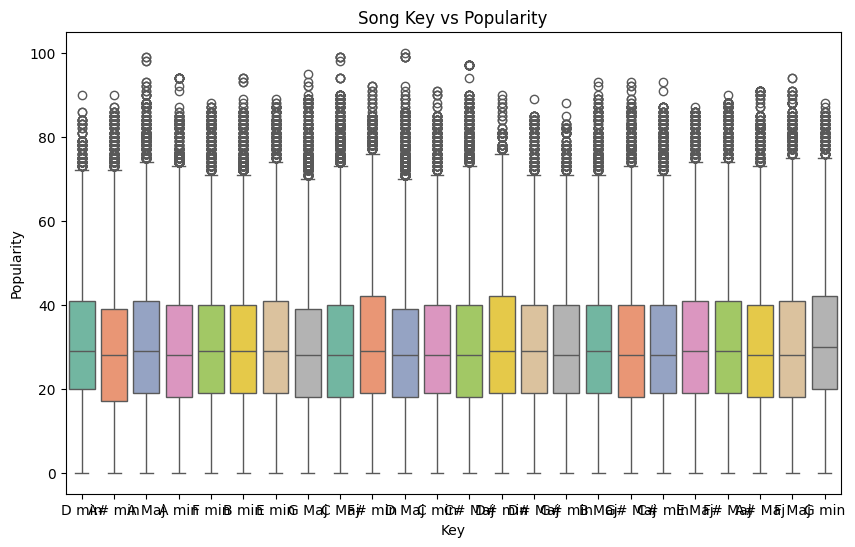

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Key', y='Popularity', data=df, palette='Set2')
plt.title('Song Key vs Popularity')
plt.xlabel('Key')
plt.ylabel('Popularity')
plt.show()

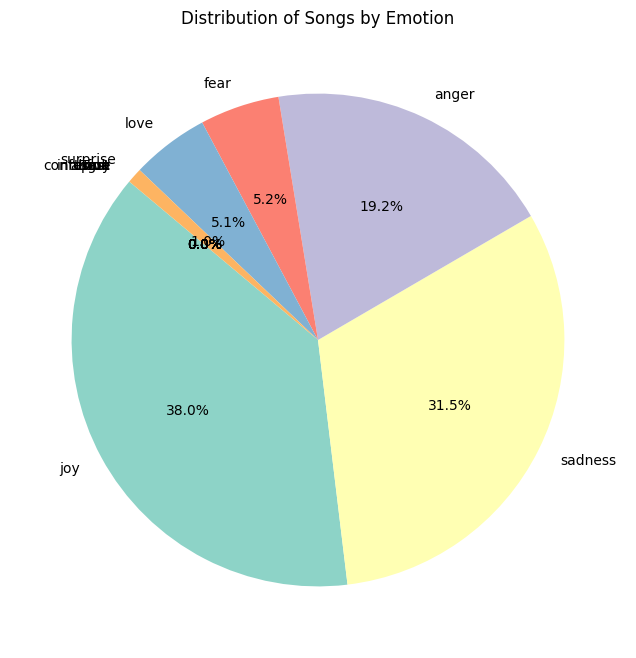

In [22]:
emotion_counts = df['emotion'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Distribution of Songs by Emotion')
plt.show()

/tmp/ipykernel_77795/923399456.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Similarity Score 1', y='Similar Song 1', data=top_similar_songs, palette='Blues_d')


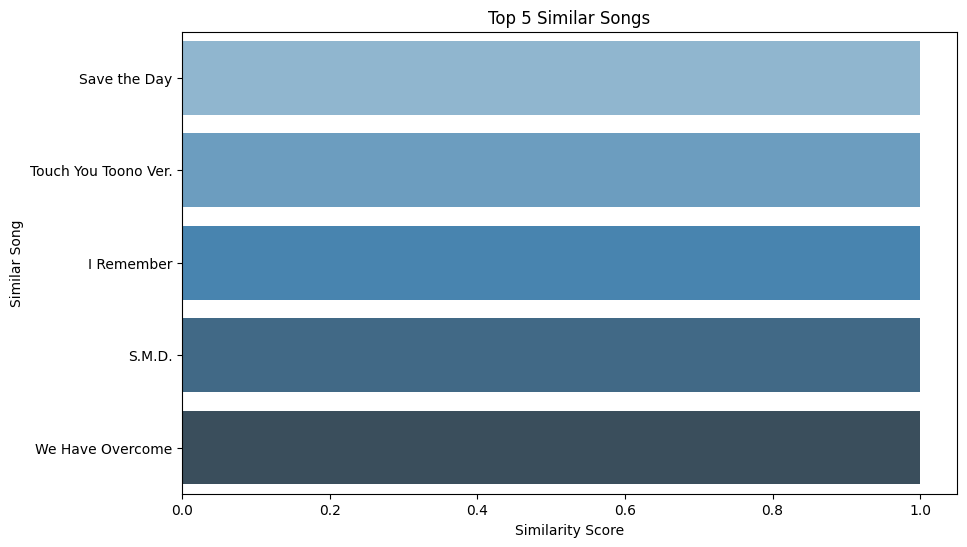

In [23]:
top_similar_songs = df[['Similar Song 1', 'Similarity Score 1']].sort_values(by='Similarity Score 1', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Similarity Score 1', y='Similar Song 1', data=top_similar_songs, palette='Blues_d')
plt.title('Top 5 Similar Songs')
plt.xlabel('Similarity Score')
plt.ylabel('Similar Song')
plt.show()

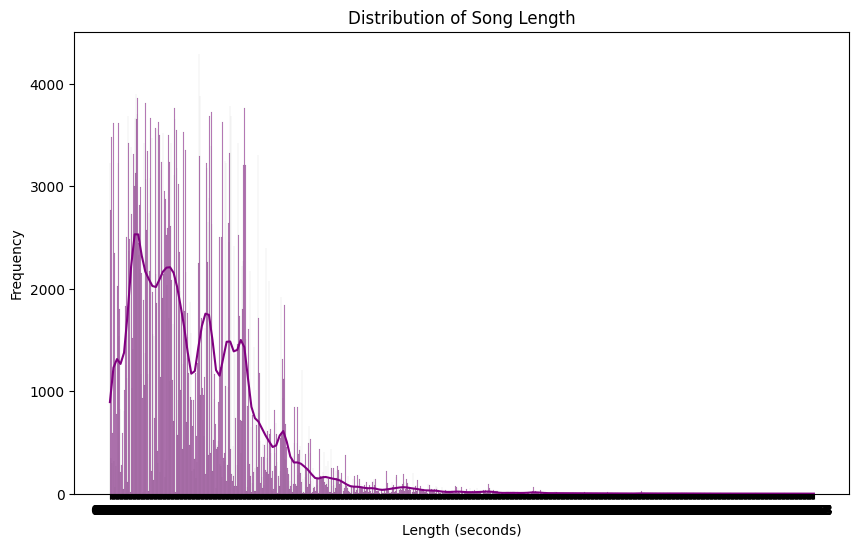

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Song Length')
plt.xlabel('Length (seconds)')
plt.ylabel('Frequency')
plt.show()